# Como sacamos las líneas de la imagen procesada
Empecemos donde lo dejamos, en este caso vamos a usar imágenes grabadas por la cámara del coche. Estas imágenes están ya recordatas, así que no tenemos que hacer ese paso. Estas imágenes están en la carpeta "video"

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
im_cropped = ndimage.imread('video/0454.jpg', mode='L')
plt.imshow(im_cropped) 
im_cropped[im_cropped < 128] = 0
im_cropped[im_cropped >= 128] = 255
dummy = plt.imshow(im_cropped)


# Saquemos los puntos donde tenemos el negro usando "where"
"sabemos" por el histograma que el fondo, donde hay máx pixels, no nos interesa, luego nos quedamos solo con los pixels con valor 0 


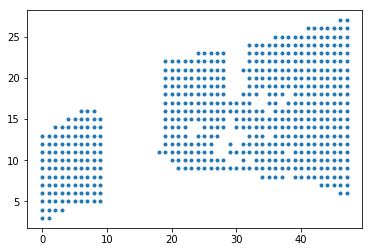

In [3]:
x, y = np.where(im_cropped == 0)
plt.plot(x,  y, '.')
# cuidado porque la imagen está "rotada". Esto nos viene bien para que el siguiente paso 
# funcione mejor por la pendiente de la recta que buscamos


# vale, y ahora, con estos puntos, como saco yo líneas?!
La regressión linear es nuestra amiga, nos permiten, dados unos puntos, encontrar una línea que se ajuste lo mejor posible a esos puntos.

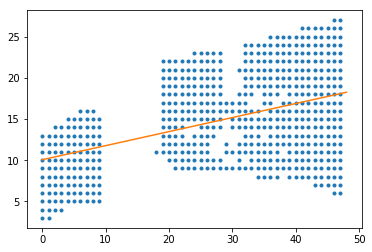

In [8]:
pfd = np.polyfit(x, y, 1)

# evaluemos el polygono
xx = np.poly1d(pfd)
lx = np.linspace(0, im_cropped.shape[0])
ly = xx(lx)
#plt.xlim((0, im_cropped.shape[1]))
#plt.ylim((im_cropped.shape[0], 0 ))
#plt.plot(y, x, '.')
plt.plot(x,  y, '.')
plt.plot(lx, ly, '-')


# "rotemos" de nuevo la recta, ojo que x e y están cambiadas para encajar con la imagen

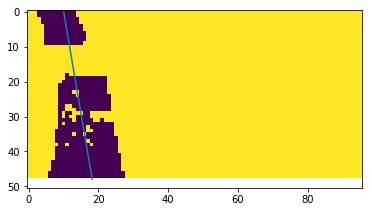

In [5]:
plt.imshow(im_cropped)
plt.plot(ly, lx, '-')

# Ahora busquemos un punto de esa línea que nos diga cuanto a la izquierda o la derecha tenemos que girar
Cuanto más arriba más estaremos anticipando el giro del coche, tomemos la mitad

In [6]:
xx = np.poly1d(pfd)
dir = xx(im_cropped.shape[0] * 0.5) /  im_cropped.shape[1] - 0.5
dir # negativo significa girar a la izquierda, possitivo derecha

-0.352483615699696